<a href="https://colab.research.google.com/github/raphaelbilecki/machine_learning_examples/blob/master/Recomenda%C3%A7%C3%A3o_Vendas_Games_Graphlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U turicreate

     |████████████████████████████████| 92.0MB 43kB/s 
     |████████████████████████████████| 3.5MB 32.7MB/s 
     |████████████████████████████████| 3.6MB 22.3MB/s 
     |████████████████████████████████| 327kB 44.2MB/s 
     |████████████████████████████████| 86.4MB 50kB/s 
     |████████████████████████████████| 18.3MB 248kB/s 
     |████████████████████████████████| 3.8MB 26.4MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 450kB 52.6MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=69e0a7f128896e1437583cf3158cf1038057dba523516c4b933537241d0166a4
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=ef3fe91037589b603a31fcbfd3ed7ca3899c1dd111ed0c89c270152680846acd
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40a

In [ ]:
import turicreate as tc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dados de Clientes**

In [ ]:
piloto = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Lista Pedido S&OP.xlsx',sheet_name='VAREJO T&C' )
print('Tamanho total do dataset '+str(len(piloto)))

Tamanho total do dataset 15835


In [ ]:
piloto_cli = piloto[' Visão Grupo - Código'].unique()

In [ ]:
piloto_cli = pd.DataFrame(piloto_cli, columns={'cliente'})

In [ ]:
piloto_cli.head()

,cliente
0,1087850
1,1114184
2,1148233
3,1060296
4,1140516


# Carga de Dados

In [ ]:
raw_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Dataset_MAT_CLI_2020_nov_2021_mai06 Varejo.xlsx',sheet_name='Sheet1' )
#não deixar campos nulos ou com traço "-"

In [ ]:
raw_data_copy = raw_data.copy()

In [ ]:
#raw_data = raw_data_copy.copy()

In [ ]:
raw_data.rename(columns={'Cliente - Código': 'cod_cli',' Material - Código':'cod_mat','Valor Receita Bruta (- Devolução)':'volume' }, inplace=True  )

In [ ]:
raw_data_copy.rename(columns={'Cliente - Código': 'cod_cli',' Material - Código':'cod_mat','Valor Receita Bruta (- Devolução)':'volume' }, inplace=True  )

In [ ]:
#(raw_data.Cluster == 2) | (raw_data.Cluster == 4) & (raw_data.top80perc == 1)

In [ ]:
raw_data.Cluster.fillna(0, inplace = True)

In [ ]:
#& (raw_data[' Sistema'] != 'INFRAESTRUTURA')& (raw_data[' Sistema'] != 'IRRIGACAO')& (raw_data[' Sistema'] != 'INDUSTRIAL') 

In [ ]:
raw_data = raw_data[ (raw_data.top80perc == 'X') &( (raw_data['Grupo de Cliente'] ==  'Varejo Espec Const') | (raw_data['Grupo de Cliente'] ==  'Varejo')| (raw_data['Grupo de Cliente'] ==  'Varejo Integrador')| (raw_data['Grupo de Cliente'] ==  'Vrj via Distribuição'))].copy()

In [ ]:
print('Numero total de Clientes analisados: ',raw_data.cod_cli.nunique() )


Numero total de Clientes analisados:  13154


In [ ]:
raw_data.columns

Index(['cod_cli', 'grp_preco', 'escritorio', 'Grupo de Cliente', 'Material',
       ' Processo', 'volume', ' Sistema', ' Subsistema', 'Linha',
       'Subsis_Linha', 'cod_mat', 'Cluster_KM', 'Cluster', 'top80perc',
       'top90perc', 'UF'],
      dtype='object')

In [ ]:
raw_data2 = raw_data[[' Processo', 'cod_cli','cod_mat','volume','Cluster_KM','UF', 'grp_preco', 'escritorio', 'Material','Subsis_Linha','Grupo de Cliente']]

In [ ]:
raw_data2.columns

Index([' Processo', 'cod_cli', 'cod_mat', 'volume', 'Cluster_KM', 'UF',
       'grp_preco', 'escritorio', 'Material', 'Subsis_Linha',
       'Grupo de Cliente'],
      dtype='object')

In [ ]:
print('Numero total de Materiais analisados: ',raw_data2.cod_mat.nunique() )

Numero total de Materiais analisados:  333


In [ ]:
#limpeza dos dados, retirar devoluções e outliers

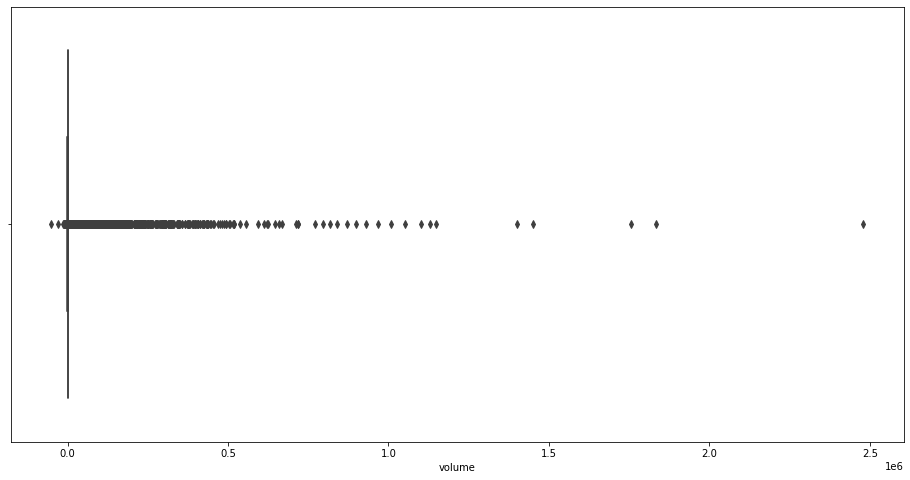

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=raw_data2.volume)

In [ ]:
# = raw_data_copy.copy()

In [ ]:
#Retirada dos valores de devolução
raw_data2 = raw_data2[raw_data2.volume > 0]

In [ ]:
#Formatting Float values for a better visualization
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#Retirada dos outliers
#Find Outlier values
mean = raw_data2.volume[(raw_data2.volume < raw_data2.volume.quantile(0.95)) & (raw_data2.volume > raw_data2.volume.quantile(0.05))].mean()
std = raw_data2.volume[(raw_data2.volume < raw_data2.volume.quantile(0.95)) & (raw_data2.volume > raw_data2.volume.quantile(0.05))].std()
out_plus = abs((mean + std*2.5))
out_less = (mean - std*2.5)

print('out plus: ',out_plus,'out less: ',out_less,'max: ', max(raw_data.volume), 'min: ', min(raw_data.volume))

out plus:  2674.021192350507 out less:  -1363.9859561340845 max:  2478489.1 min:  -50602.70999999999


In [ ]:
outliers =  (mean + std*2.5) < raw_data2.volume
raw_data2.volume[outliers] = np.nan
#SP_results.fillna(0, inplace=True)
#SP_results.fillna(median, inplace=True)
raw_data2.volume.fillna((mean + std*2.5), inplace=True)
raw_data2.describe()

,cod_cli,volume,Cluster_KM,Material
count,"500,726.00","500,726.00","500,726.00","500,726.00"
mean,"1,058,813.62",692.98,1.00,"37,750,926.26"
std,"39,327.90",798.01,0.00,"48,455,875.22"
min,"1,000,003.00",0.13,1.00,"10,001,900.00"
25%,"1,033,697.00",159.00,1.00,"22,140,329.00"
50%,"1,048,999.00",337.20,1.00,"26,301,009.00"
75%,"1,073,524.00",859.20,1.00,"33,046,995.00"
max,"1,151,920.00","2,674.02",1.00,"300,000,488.00"


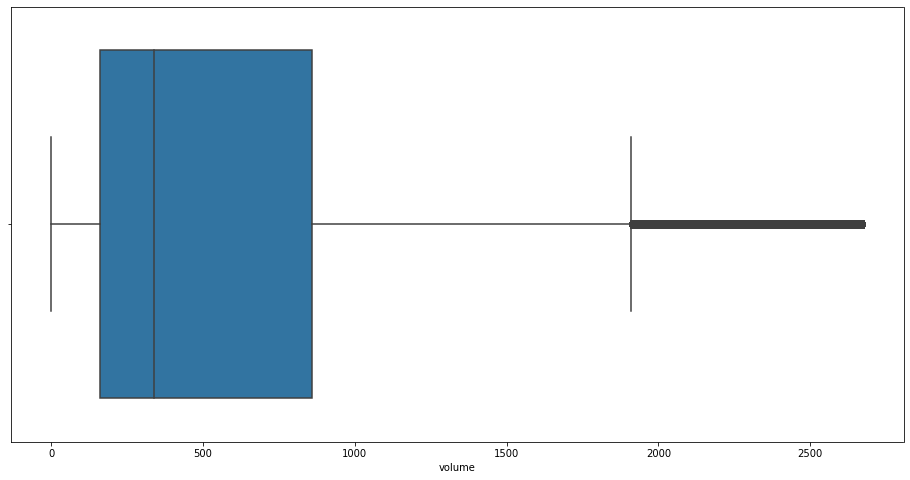

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=raw_data2.volume)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


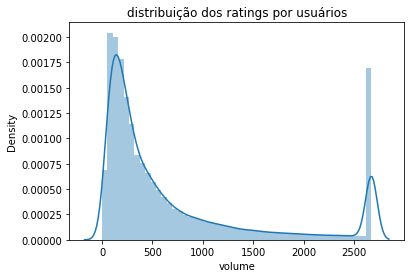

In [ ]:
ax = sns.distplot(raw_data2.volume)
plot_is = ax.set(title='distribuição dos ratings por usuários')

In [ ]:
#volume total por cliente
grouped_data = raw_data2.groupby('cod_cli')['volume'].sum()

In [ ]:
raw_data2 = pd.merge(raw_data2,grouped_data, right_index=False,suffixes=('','_total') , left_index=True,how='left', on= 'cod_cli')

In [ ]:
raw_data2['volume'] = raw_data2['volume']/raw_data2['volume_total']

In [ ]:
raw_data2.drop(columns=['volume_total'], inplace=True)

In [ ]:
#raw_data2['volume'] = raw_data2['volume'] *100

In [ ]:
raw_data2.head()

,Processo,cod_cli,cod_mat,volume,Cluster_KM,UF,grp_preco,escritorio,Material,Subsis_Linha,Grupo de Cliente
4188,EXTRUSAO,1044791,TUBO ESG PRIM TIGRE BV 6M 100MM,0.01,1,SP,LIDERANCA 02,CANAL DIRETO,11031030,TUBO 50MMOutro100MM,Varejo Espec Const
4315,EXTRUSAO,1045362,TUBO ESG PRIM TIGRE BV 6M 100MM,0.00,1,SP,LIDERANCA 02,CONST. CIVIL,11031030,TUBO 50MMOutro100MM,Varejo Espec Const
6726,EXTRUSAO,1055747,TUBO ESG PRIM TIGRE BV 6M 100MM,0.00,1,DF,LIDERANCA 02,CONST. CIVIL,11031030,TUBO 50MMOutro100MM,Varejo Espec Const
4315,EXTRUSAO,1045362,"TUBO ESG SERIE R BV 6,00M DN100",0.00,1,SP,LIDERANCA 02,CONST. CIVIL,11055010,TUBO 50MMOutro100MM,Varejo Espec Const
6726,EXTRUSAO,1055747,"TUBO SOLD NBR 5648 6,00M 50MM",0.00,1,DF,LIDERANCA 02,CONST. CIVIL,10120500,TUBO 40MMOutro50MM,Varejo Espec Const


In [ ]:
raw_data2['binario'] = 0

In [ ]:
raw_data2.binario[raw_data2.volume > 0 ] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data2.binario[raw_data2.volume == 0 ] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Criação do Modelo

In [ ]:
#raw_data.drop(columns='Cluster', inplace = True)

In [ ]:
raw_data2.columns

Index([' Processo', 'cod_cli', 'cod_mat', 'volume', 'Cluster_KM', 'UF',
       'grp_preco', 'escritorio', 'Material', 'Subsis_Linha',
       'Grupo de Cliente', 'binario'],
      dtype='object')

In [ ]:
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500726 entries, 4188 to 4746
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    Processo         500726 non-null  object 
 1   cod_cli           500726 non-null  int64  
 2   cod_mat           500726 non-null  object 
 3   volume            500726 non-null  float64
 4   Cluster_KM        500726 non-null  int64  
 5   UF                500726 non-null  object 
 6   grp_preco         500726 non-null  object 
 7   escritorio        500726 non-null  object 
 8   Material          500726 non-null  int64  
 9   Subsis_Linha      500726 non-null  object 
 10  Grupo de Cliente  500726 non-null  object 
 11  binario           500726 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 49.7+ MB


In [ ]:
raw_data2.to_csv('/content/drive/My Drive/Colab Notebooks/Data/raw_data.csv')

In [ ]:
actions = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/raw_data.csv')

In [ ]:
actions = tc.SFrame(data=actions)

In [ ]:
'''actions = tc.SFrame.read_csv('/content/drive/My Drive/Colab Notebooks/Data/raw_data.csv', header=True,
usecols =['cod_cli', 'cod_mat', 'volume', 'Cluster', 'UF', 'grp_preco','escritorio', 'Material', 'binario','Subsis_Linha','Grupo de Cliente'],
column_type_hints= {'cod_cli':int, 'cod_mat':int, 'volume':float, 'Cluster_KM':int, 'UF':str, 'grp_preco':str,
       'escritorio':str, 'Material':str, 'binario':int,'Subsis_Linha':str,'Grupo de Cliente':str })'''

"actions = tc.SFrame.read_csv('/content/drive/My Drive/Colab Notebooks/Data/raw_data.csv', header=True,\nusecols =['cod_cli', 'cod_mat', 'volume', 'Cluster', 'UF', 'grp_preco','escritorio', 'Material', 'binario','Subsis_Linha','Grupo de Cliente'],\ncolumn_type_hints= {'cod_cli':int, 'cod_mat':int, 'volume':float, 'Cluster_KM':int, 'UF':str, 'grp_preco':str,\n       'escritorio':str, 'Material':str, 'binario':int,'Subsis_Linha':str,'Grupo de Cliente':str })"

In [ ]:
actions.dtype

[int, str, int, str, float, int, str, str, str, int, str, str, int]

In [ ]:
raw_data2.columns

Index([' Processo', 'cod_cli', 'cod_mat', 'volume', 'Cluster_KM', 'UF',
       'grp_preco', 'escritorio', 'Material', 'Subsis_Linha',
       'Grupo de Cliente', 'binario'],
      dtype='object')

In [ ]:
actions = actions[['cod_cli','Material','binario','volume','Cluster_KM', 'UF', 'grp_preco', 'escritorio','Grupo de Cliente',' Processo']]

In [ ]:
actions.tail(15)

cod_cli,Material,binario,volume,Cluster_KM,UF,grp_preco,escritorio
1043405,100002305,1,7.941061485904829e-06,1,PR,LIDERANCA 02,CONST. CIVIL
1053219,53010229,1,0.001253089212990356,1,MG,CONEXAO,IND. VAREJO
1121384,22200259,1,0.00019394892290465664,1,SC,CONEXAO,IND. VAREJO
1048419,22200321,1,0.0001797850938805632,1,RS,CONEXAO,IRRIGAÇÃO
1047088,26241006,1,1.1022347151297304e-05,1,PR,LIDERANCA 01,CANAL DIRETO
1045404,54501900,1,5.08775041019217e-06,1,SP,LIDERANCA 01,CANAL DIRETO
1044544,22200500,1,2.9763618688557487e-06,1,SP,LIDERANCA 02,CANAL DIRETO
1029838,300000453,1,2.2650296924246327e-05,1,RJ,ALIANCA 01,CANAL DIRETO
1044544,22170511,1,1.693864478210589e-06,1,SP,LIDERANCA 02,CANAL DIRETO
1047088,35227822,1,2.755586787824326e-06,1,PR,LIDERANCA 01,CANAL DIRETO


In [ ]:
c_side_data = actions[['cod_cli', 'UF', 'grp_preco', 'escritorio','Grupo de Cliente']]
#c_side_data = actions[['cod_cli','Cluster','UF']]

In [ ]:
m_side_data = actions['Material',' Processo']


In [ ]:
training_data, validation_data = tc.recommender.util.random_split_by_user(actions,  'cod_cli', 'Material', random_seed= 25, item_test_proportion=0.35)

In [ ]:
model = tc.recommender.create( training_data, 'cod_cli', 'Material','volume',user_data=c_side_data, item_data=m_side_data )
#,user_data=c_side_data, item_data= m_side_data

Preparing data set.

Data has 500726 observations with 13066 users and 333 items.

Data prepared in: 1.76935s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 62590 / 500726 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.57143           | Not Viable                               |

| 1       | 0.892857          | Not Viable                               |

| 2       | 0.223214          | Not Viable                               |

| 3       | 0.0558036         | 0.00229675                               |

| 4       | 0.0279018         | 0.00211371                               |

| 5       | 0.0139509         | 0.0023762                                |

| 6       | 0.00697545        | 0.00291008                               |

| 7       | 0.00348772        | 0.00315462                               |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 0.00211371                               |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 134us        | 0.00596493        | 0.0551085             |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 4.36s        | 0.00331989        | 0.0465011             | 0.0279018   |

| 2       | 8.41s        | 0.00230137        | 0.0369341             | 0.0279018   |

| 3       | 12.33s       | 0.00189306        | 0.032351              | 0.0279018   |

| 4       | 16.14s       | 0.00168791        | 0.0298624             | 0.0279018   |

| 5       | 19.94s       | 0.00151321        | 0.0275051             | 0.0279018   |

| 7       | 27.40s       | 0.00140666        | 0.0265306             | 0.0279018   |

| 8       | 31.15s       | 0.00126946        | 0.0241826             | 0.0279018   |

| 9       | 34.81s       | 0.00123622        | 0.0238992             | 0.0279018   |

| 10      | 38.47s       | 0.00119674        | 0.0233561             | 0.0279018   |

| 11      | 42.13s       | 0.00111648        | 0.0217347             | 0.0279018   |

| 12      | 45.74s       | 0.00107817        | 0.0211074             | 0.0279018   |

| 13      | 49.41s       | 0.0010546         | 0.020782              | 0.0279018   |

| 14      | 53.04s       | 0.00102303        | 0.0202161             | 0.0279018   |

| 15      | 56.64s       | 0.00101375        | 0.0201828             | 0.0279018   |

| 16      | 1m 0s        | 0.000984666       | 0.0196443             | 0.0279018   |

| 17      | 1m 3s        | 0.000984723       | 0.0198072             | 0.0279018   |

| 18      | 1m 7s        | 0.000950901       | 0.0191313             | 0.0279018   |

| 19      | 1m 11s       | 0.000942287       | 0.0189308             | 0.0279018   |

| 20      | 1m 14s       | 0.00093532        | 0.0189143             | 0.0279018   |

| 21      | 1m 18s       | 0.000922197       | 0.0186563             | 0.0279018   |

| 22      | 1m 21s       | 0.000907373       | 0.0184641             | 0.0279018   |

| 23      | 1m 25s       | 0.000894063       | 0.0182344             | 0.0279018   |

| 24      | 1m 28s       | 0.00088644        | 0.0180535             | 0.0279018   |

| 25      | 1m 32s       | 0.000878111       | 0.0179199             | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.000968548

Final training RMSE: 0.017802

In [ ]:
item_ex = tc.SFrame(raw_data[['cod_cli','Material']][(raw_data[' Sistema'] == 'INFRAESTRUTURA') |(raw_data[' Sistema'] == 'IRRIGACAO') |(raw_data[' Sistema'] == 'INDUSTRIAL')])  

https://apple.github.io/turicreate/docs/api/generated/turicreate.recommender.factorization_recommender.FactorizationRecommender.recommend.html#turicreate.recommender.factorization_recommender.FactorizationRecommender.recommend

In [ ]:
model.recommend(users=['1129945'],exclude=item_ex  )

cod_cli,Material,score,rank
1129945,27801056,-0.024571719144517168,1
1129945,27019985,-0.038486385515937194,2
1129945,22220500,-0.04547631109184547,3
1129945,33046979,-0.047073418770962945,4
1129945,33046995,-0.048238583754794284,5
1129945,33044410,-0.050603659388655416,6
1129945,33047002,-0.0526951263035178,7
1129945,22150324,-0.05335815643942876,8
1129945,22120328,-0.05833813100056684,9
1129945,22000500,-0.05868944557900502,10


In [ ]:
raw_data2[['cod_cli','volume','Material']][(raw_data2['cod_cli'] == 1003338) & (raw_data2['volume'] > 0.001 ) ].sort_values(by = ['volume'],ascending=False ).count()

cod_cli     48
volume      48
Material    48
dtype: int64

In [ ]:
raw_data2.columns

Index([' Processo', 'cod_cli', 'cod_mat', 'volume', 'Cluster_KM', 'UF',
       'grp_preco', 'escritorio', 'Material', 'Subsis_Linha',
       'Grupo de Cliente', 'binario'],
      dtype='object')

In [ ]:
raw_data2[['cod_cli','volume','Material',' Processo','Grupo de Cliente','escritorio','Subsis_Linha']][(raw_data2['cod_cli'] == 1003338) & (raw_data2['volume'] > 0.001 ) ].sort_values(by = ['volume'],ascending=False ).head(42)

,cod_cli,volume,Material,Processo,Grupo de Cliente,escritorio,Subsis_Linha
371,1003338,0.17,11031030,EXTRUSAO,Varejo,IND. VAREJO,TUBO 50MMOutro100MM
371,1003338,0.17,10120250,EXTRUSAO,Varejo,IND. VAREJO,TUBO 20MMOutro32MM
371,1003338,0.05,14210253,EXTRUSAO,Varejo,IND. VAREJO,ELETRODUTO LEVE
371,1003338,0.04,10120500,EXTRUSAO,Varejo,IND. VAREJO,TUBO 40MMOutro50MM
371,1003338,0.04,26367484,INJECAO,Varejo,IND. VAREJO,CONEXAO 50MMOutro110MM
371,1003338,0.03,53001025,TERCEIRO,Varejo,IND. VAREJO,ADESIVO PVC INCOLOR
371,1003338,0.03,11030602,EXTRUSAO,Varejo,IND. VAREJO,TUBO 50MMOutro100MM
371,1003338,0.03,26241006,INJECAO,Varejo,IND. VAREJO,CONEXAO 50MMOutro110MM
371,1003338,0.03,53020151,TERCEIRO,Varejo,IND. VAREJO,ADESIVO PVC INCOLOR
371,1003338,0.03,27131328,INJECAO,Varejo,IND. VAREJO,CAIXA SIFONADA COMPLETO


In [ ]:
model.get_similar_items(['TUBO SOLD NBR 5648 6,00M 25MM'])

Material,similar,score,rank


In [ ]:
model.get_similar_users(users=[1024657] ,k=10)

Getting similar users completed in 0.001585

cod_cli,similar,score,rank
1024657,1056012,0.7757031321525574,1
1024657,1145755,0.6802785396575928,2
1024657,1060708,0.6792468428611755,3
1024657,1009133,0.6787852048873901,4
1024657,1050362,0.6740198135375977,5
1024657,1063059,0.6686318516731262,6
1024657,1007950,0.6463801860809326,7
1024657,1022412,0.6427121162414551,8
1024657,1050191,0.6413745880126953,9
1024657,1036691,0.6383286118507385,10


In [ ]:
model.evaluate(actions,target='volume', exclude_known_for_precision_recall= False)

recommendations finished on 1000/13066 queries. users per second: 4198.4

recommendations finished on 2000/13066 queries. users per second: 4335.97

recommendations finished on 3000/13066 queries. users per second: 4405.23

recommendations finished on 4000/13066 queries. users per second: 4397.29

recommendations finished on 5000/13066 queries. users per second: 4409.79

recommendations finished on 6000/13066 queries. users per second: 4374.35

recommendations finished on 7000/13066 queries. users per second: 4415.96

recommendations finished on 8000/13066 queries. users per second: 4406.42

recommendations finished on 9000/13066 queries. users per second: 4420.63

recommendations finished on 10000/13066 queries. users per second: 4404

recommendations finished on 11000/13066 queries. users per second: 4394.61

recommendations finished on 12000/13066 queries. users per second: 4387.68

recommendations finished on 13000/13066 queries. users per second: 4385.99


Precision and recall summary statistics by cutoff
+--------+--------------------+---------------------+
| cutoff |   mean_precision   |     mean_recall     |
+--------+--------------------+---------------------+
|   1    | 0.7446043165467623 | 0.07180533806423928 |
|   2    | 0.6683376702893006 | 0.10801094331112086 |
|   3    | 0.6236287565692126 | 0.13534466898812142 |
|   4    | 0.5956490127047279 |  0.1589444163411759 |
|   5    | 0.5750344405326807 | 0.17927022100178439 |
|   6    | 0.5582172559824492 | 0.19781480021298375 |
|   7    | 0.5436465417331768 | 0.21508721926564633 |
|   8    | 0.5319244604316563 |  0.2312712707450384 |
|   9    | 0.5228157899212555 | 0.24749424798990893 |
|   10   | 0.5147635083422616 |  0.2624699871271361 |
+--------+--------------------+---------------------+
[10 rows x 3 columns]


Overall RMSE: 0.01981108830699563

Per User RMSE (best)
+---------+-----------------------+-------+
| cod_cli |          rmse         | count |
+---------+--------------

{'precision_recall_by_user': Columns:
 	cod_cli	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 235188
 
 Data:
 +---------+--------+-----------+---------------------+-------+
 | cod_cli | cutoff | precision |        recall       | count |
 +---------+--------+-----------+---------------------+-------+
 | 1044791 |   1    |    1.0    | 0.00546448087431694 |  183  |
 | 1044791 |   2    |    1.0    | 0.01092896174863388 |  183  |
 | 1044791 |   3    |    1.0    | 0.01639344262295082 |  183  |
 | 1044791 |   4    |    1.0    | 0.02185792349726776 |  183  |
 | 1044791 |   5    |    1.0    |  0.0273224043715847 |  183  |
 | 1044791 |   6    |    1.0    | 0.03278688524590164 |  183  |
 | 1044791 |   7    |    1.0    | 0.03825136612021858 |  183  |
 | 1044791 |   8    |    1.0    | 0.04371584699453552 |  183  |
 | 1044791 |   9    |    1.0    | 0.04918032786885246 |  183  |
 | 1044791 |   10   |    1.0    |  0.0546448087431694 |  183  |
 +---------+--------+-----------+

In [ ]:
#m = tc.ranking_factorization_recommender.create(actions, max_iterations=200,target='volume', user_id='cod_cli', item_id='Material',side_data_factorization=True,user_data= c_side_data, random_seed=42)

In [ ]:
#training_data, validation_data = tc.recommender.util.random_split_by_user(actions,  'cod_cli', 'Material')

In [ ]:
m = tc.ranking_factorization_recommender.create(training_data, max_iterations=500,target='volume', user_id='cod_cli', item_id='Material',side_data_factorization=True,user_data=c_side_data, item_data=m_side_data , random_seed=42)

Preparing data set.

Data has 488386 observations with 13066 users and 333 items.

Data prepared in: 1.98369s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 500      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 61048 / 488386 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.57143           | Not Viable                               |

| 1       | 0.892857          | Not Viable                               |

| 2       | 0.223214          | Not Viable                               |

| 3       | 0.0558036         | 0.00220172                               |

| 4       | 0.0279018         | 0.00209355                               |

| 5       | 0.0139509         | 0.0025813                                |

| 6       | 0.00697545        | 0.002733                                 |

| 7       | 0.00348772        | 0.00311257                               |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 0.00209355                               |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 138us        | 0.00598273        | 0.0551581             |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 4.31s        | 0.00340231        | 0.047129              | 0.0279018   |

| 2       | 8.33s        | 0.00231471        | 0.0371528             | 0.0279018   |

| 3       | 12.25s       | 0.00189866        | 0.0325007             | 0.0279018   |

| 4       | 16.11s       | 0.00169648        | 0.0300872             | 0.0279018   |

| 5       | 19.97s       | 0.00153028        | 0.0278324             | 0.0279018   |

| 7       | 27.57s       | 0.00134045        | 0.0252766             | 0.0279018   |

| 8       | 31.32s       | 0.0012475         | 0.0237111             | 0.0279018   |

| 9       | 35.03s       | 0.00120667        | 0.0232325             | 0.0279018   |

| 10      | 38.70s       | 0.00113802        | 0.0220731             | 0.0279018   |

| 11      | 42.35s       | 0.00109629        | 0.0213128             | 0.0279018   |

| 12      | 46.00s       | 0.00107399        | 0.0210113             | 0.0279018   |

| 13      | 49.69s       | 0.00103572        | 0.0203412             | 0.0279018   |

| 14      | 53.32s       | 0.00101504        | 0.0199471             | 0.0279018   |

| 15      | 56.93s       | 0.00100677        | 0.0199957             | 0.0279018   |

| 16      | 1m 0s        | 0.000980413       | 0.0194708             | 0.0279018   |

| 17      | 1m 4s        | 0.000961623       | 0.019186              | 0.0279018   |

| 18      | 1m 7s        | 0.000944122       | 0.018903              | 0.0279018   |

| 19      | 1m 11s       | 0.000932018       | 0.0185768             | 0.0279018   |

| 20      | 1m 14s       | 0.00092216        | 0.0184983             | 0.0279018   |

| 21      | 1m 18s       | 0.000910724       | 0.0183252             | 0.0279018   |

| 22      | 1m 22s       | 0.000903305       | 0.018116              | 0.0279018   |

| 23      | 1m 25s       | 0.000898919       | 0.0181425             | 0.0279018   |

| 24      | 1m 29s       | 0.000876894       | 0.0177961             | 0.0279018   |

| 25      | 1m 32s       | 0.00087727        | 0.0177573             | 0.0279018   |

| 26      | 1m 36s       | 0.000869615       | 0.0176834             | 0.0279018   |

| 27      | 1m 40s       | 0.000859759       | 0.0174923             | 0.0279018   |

| 28      | 1m 43s       | 0.000846379       | 0.0173074             | 0.0279018   |

| 29      | 1m 47s       | 0.000845341       | 0.0172631             | 0.0279018   |

| 30      | 1m 50s       | 0.000839572       | 0.0171478             | 0.0279018   |

| 31      | 1m 54s       | 0.000833852       | 0.0170666             | 0.0279018   |

| 32      | 1m 57s       | 0.000829187       | 0.0170166             | 0.0279018   |

| 33      | 2m 1s        | 0.000824206       | 0.016887              | 0.0279018   |

| 34      | 2m 4s        | 0.000816566       | 0.0168388             | 0.0279018   |

| 35      | 2m 8s        | 0.000813239       | 0.0168331             | 0.0279018   |

| 36      | 2m 12s       | 0.000812858       | 0.0167874             | 0.0279018   |

| 37      | 2m 15s       | 0.000806095       | 0.0166443             | 0.0279018   |

| 38      | 2m 19s       | 0.000803832       | 0.0166247             | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.000898329

Final training RMSE: 0.0173563

In [ ]:
m.recommend(users=['1003338'],exclude=item_ex )

cod_cli,Material,score,rank
1003338,10120250,0.0408762772382914,1
1003338,11031030,0.023284726757717034,2
1003338,27019919,-0.006118256850007275,3
1003338,26915848,-0.018850805256354908,4
1003338,100019323,-0.018890028837907413,5
1003338,33046995,-0.01951363358630548,6
1003338,22150251,-0.020788358542907337,7
1003338,35227822,-0.022186948063156853,8
1003338,35308369,-0.023488060356888274,9
1003338,26915856,-0.02401940200461755,10


In [ ]:
actions[actions['cod_cli'] == 1003338].tail()

cod_cli,Material,binario,volume,Cluster_KM,UF,grp_preco,escritorio,Grupo de Cliente
1003338,22200259,1,0.00539429994484295,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,22000500,1,0.0053135469516566785,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,22200500,1,0.0046126109707998394,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,35217789,1,0.004380042350423378,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,26240506,1,0.003643575052564578,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,22120255,1,0.0035692822988332095,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,22150502,1,0.003110605297535185,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,22140256,1,0.002894187275795977,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,27550401,1,0.0020511260269313013,1,RS,CONEXAO,IND. VAREJO,Varejo
1003338,22170252,1,0.0019380718364705206,1,RS,CONEXAO,IND. VAREJO,Varejo


In [ ]:
m.get_similar_items(['TUBO SOLD NBR 5648 6,00M 25MM'])

Material,similar,score,rank


In [ ]:
m.evaluate(actions, target='volume', exclude_known_for_precision_recall = True)

recommendations finished on 1000/13066 queries. users per second: 4881.55

recommendations finished on 2000/13066 queries. users per second: 4695.7

recommendations finished on 3000/13066 queries. users per second: 4754.96

recommendations finished on 4000/13066 queries. users per second: 4820.73

recommendations finished on 5000/13066 queries. users per second: 4830.6

recommendations finished on 6000/13066 queries. users per second: 4855.72

recommendations finished on 7000/13066 queries. users per second: 4851.51

recommendations finished on 8000/13066 queries. users per second: 4867.63

recommendations finished on 9000/13066 queries. users per second: 4859.04

recommendations finished on 10000/13066 queries. users per second: 4861.78

recommendations finished on 11000/13066 queries. users per second: 4876.95

recommendations finished on 12000/13066 queries. users per second: 4857.94

recommendations finished on 13000/13066 queries. users per second: 4835.65


Precision and recall summary statistics by cutoff
+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    |  0.6819225470687275 |  0.0643967473067962 |
|   2    |  0.6078754018062138 | 0.09782523121774948 |
|   3    |  0.5663809378029494 | 0.12214055000581686 |
|   4    |  0.5361625593142494 |  0.1421568154508856 |
|   5    |  0.5152456757997895 |  0.1604242570100391 |
|   6    |  0.4989285167610601 | 0.17740433573157702 |
|   7    | 0.48603791738645596 | 0.19363394794330577 |
|   8    | 0.47464794122149084 |  0.2088106711977036 |
|   9    | 0.46435192271714565 |  0.222976715233715  |
|   10   | 0.45556405939078565 | 0.23632234288995985 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]


Overall RMSE: 0.019177094912751262

Per User RMSE (best)
+---------+-----------------------+-------+
| cod_cli |          rmse         | count |
+---------

{'precision_recall_by_user': Columns:
 	cod_cli	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 235188
 
 Data:
 +---------+--------+-----------+--------+-------+
 | cod_cli | cutoff | precision | recall | count |
 +---------+--------+-----------+--------+-------+
 | 1044791 |   1    |    0.0    |  0.0   |  183  |
 | 1044791 |   2    |    0.0    |  0.0   |  183  |
 | 1044791 |   3    |    0.0    |  0.0   |  183  |
 | 1044791 |   4    |    0.0    |  0.0   |  183  |
 | 1044791 |   5    |    0.0    |  0.0   |  183  |
 | 1044791 |   6    |    0.0    |  0.0   |  183  |
 | 1044791 |   7    |    0.0    |  0.0   |  183  |
 | 1044791 |   8    |    0.0    |  0.0   |  183  |
 | 1044791 |   9    |    0.0    |  0.0   |  183  |
 | 1044791 |   10   |    0.0    |  0.0   |  183  |
 +---------+--------+-----------+--------+-------+
 [235188 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and col

In [ ]:
#model_performance = tc.recommender.util.compare_models(test_data, models=[model, personalized_model,m], user_sample=.07)

# Piloto

In [ ]:
m = tc.ranking_factorization_recommender.create(actions, max_iterations=500,target='volume', user_id='cod_cli', item_id='Material',side_data_factorization=True,user_data=c_side_data, item_data=m_side_data , random_seed=42)

Preparing data set.

Data has 500726 observations with 13066 users and 333 items.

Data prepared in: 2.04669s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 500      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 62590 / 500726 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.57143           | Not Viable                               |

| 1       | 0.892857          | Not Viable                               |

| 2       | 0.223214          | Not Viable                               |

| 3       | 0.0558036         | 0.00219106                               |

| 4       | 0.0279018         | 0.00200623                               |

| 5       | 0.0139509         | 0.00237382                               |

| 6       | 0.00697545        | 0.00282779                               |

| 7       | 0.00348772        | 0.00326329                               |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 0.00200623                               |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 214us        | 0.00598759        | 0.0551778             |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 5.12s        | 0.00338459        | 0.0470666             | 0.0279018   |

| 2       | 9.92s        | 0.00229856        | 0.037009              | 0.0279018   |

| 3       | 14.06s       | 0.00192133        | 0.0329136             | 0.0279018   |

| 4       | 18.09s       | 0.00166307        | 0.0296817             | 0.0279018   |

| 5       | 22.00s       | 0.00153202        | 0.0280897             | 0.0279018   |

| 7       | 29.74s       | 0.0013007         | 0.0246863             | 0.0279018   |

| 8       | 33.60s       | 0.00122807        | 0.0235858             | 0.0279018   |

| 9       | 37.44s       | 0.00117062        | 0.0226891             | 0.0279018   |

| 10      | 41.27s       | 0.00113289        | 0.0221056             | 0.0279018   |

| 11      | 45.05s       | 0.00109949        | 0.0216217             | 0.0279018   |

| 12      | 48.84s       | 0.00106152        | 0.0208533             | 0.0279018   |

| 13      | 52.60s       | 0.00102973        | 0.0204001             | 0.0279018   |

| 14      | 56.36s       | 0.0010049         | 0.0199661             | 0.0279018   |

| 15      | 1m 0s        | 0.000978036       | 0.0195984             | 0.0279018   |

| 16      | 1m 3s        | 0.000980071       | 0.0197084             | 0.0279018   |

| 17      | 1m 7s        | 0.000965893       | 0.0195193             | 0.0279018   |

| 18      | 1m 11s       | 0.00094951        | 0.0191664             | 0.0279018   |

| 19      | 1m 15s       | 0.000933214       | 0.0188504             | 0.0279018   |

| 20      | 1m 18s       | 0.000912078       | 0.0184813             | 0.0279018   |

| 21      | 1m 22s       | 0.000907678       | 0.0184677             | 0.0279018   |

| 22      | 1m 26s       | 0.000890181       | 0.0181433             | 0.0279018   |

| 23      | 1m 29s       | 0.000886064       | 0.0180803             | 0.0279018   |

| 24      | 1m 33s       | 0.000872156       | 0.0179021             | 0.0279018   |

| 25      | 1m 37s       | 0.00086596        | 0.0176956             | 0.0279018   |

| 26      | 1m 41s       | 0.000860483       | 0.0176934             | 0.0279018   |

| 27      | 1m 44s       | 0.000852264       | 0.0174602             | 0.0279018   |

| 28      | 1m 48s       | 0.000845276       | 0.0174049             | 0.0279018   |

| 29      | 1m 52s       | 0.000837714       | 0.0172996             | 0.0279018   |

| 30      | 1m 55s       | 0.000832329       | 0.0171456             | 0.0279018   |

| 31      | 1m 59s       | 0.000822744       | 0.0170374             | 0.0279018   |

| 32      | 2m 3s        | 0.000816999       | 0.01697               | 0.0279018   |

| 33      | 2m 6s        | 0.000813788       | 0.0168591             | 0.0279018   |

| 34      | 2m 10s       | 0.000808519       | 0.0168607             | 0.0279018   |

| 35      | 2m 14s       | 0.000803573       | 0.0167804             | 0.0279018   |

| 36      | 2m 17s       | 0.000802823       | 0.016741              | 0.0279018   |

| 37      | 2m 21s       | 0.000794019       | 0.0165964             | 0.0279018   |

| 38      | 2m 25s       | 0.00079205        | 0.0165351             | 0.0279018   |

| 39      | 2m 28s       | 0.00078906        | 0.0164855             | 0.0279018   |

| 40      | 2m 32s       | 0.00078163        | 0.0164231             | 0.0279018   |

| 41      | 2m 36s       | 0.000779568       | 0.0163739             | 0.0279018   |

| 42      | 2m 39s       | 0.000777336       | 0.0163277             | 0.0279018   |

| 43      | 2m 43s       | 0.000771949       | 0.0162339             | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.00086107

Final training RMSE: 0.0159875

In [ ]:
model = tc.recommender.create( actions, 'cod_cli', 'Material','volume',user_data=c_side_data, item_data=m_side_data )

Preparing data set.

Data has 500726 observations with 13066 users and 333 items.

Data prepared in: 1.97225s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 62590 / 500726 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.57143           | Not Viable                               |

| 1       | 0.892857          | Not Viable                               |

| 2       | 0.223214          | Not Viable                               |

| 3       | 0.0558036         | 0.00232813                               |

| 4       | 0.0279018         | 0.00200941                               |

| 5       | 0.0139509         | 0.00240762                               |

| 6       | 0.00697545        | 0.00283982                               |

| 7       | 0.00348772        | 0.0032648                                |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 0.00200941                               |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 188us        | 0.005964          | 0.0550945             |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 4.52s        | 0.00337367        | 0.0469845             | 0.0279018   |

| 2       | 8.71s        | 0.0023057         | 0.0370343             | 0.0279018   |

| 3       | 12.76s       | 0.0019022         | 0.0326482             | 0.0279018   |

| 4       | 16.81s       | 0.00168241        | 0.0298854             | 0.0279018   |

| 5       | 20.73s       | 0.00151505        | 0.0277782             | 0.0279018   |

| 7       | 28.44s       | 0.00134406        | 0.0255181             | 0.0279018   |

| 8       | 32.29s       | 0.00123261        | 0.0236581             | 0.0279018   |

| 9       | 36.30s       | 0.00119917        | 0.0232524             | 0.0279018   |

| 10      | 40.33s       | 0.00115146        | 0.0225547             | 0.0279018   |

| 11      | 44.37s       | 0.00109271        | 0.021373              | 0.0279018   |

| 12      | 48.43s       | 0.00105837        | 0.0207665             | 0.0279018   |

| 13      | 52.30s       | 0.00103441        | 0.0204363             | 0.0279018   |

| 14      | 56.21s       | 0.00100079        | 0.0198785             | 0.0279018   |

| 15      | 1m 0s        | 0.00098694        | 0.0197591             | 0.0279018   |

| 16      | 1m 3s        | 0.000969217       | 0.0193729             | 0.0279018   |

| 17      | 1m 7s        | 0.000969951       | 0.0195216             | 0.0279018   |

| 18      | 1m 11s       | 0.000936669       | 0.0188345             | 0.0279018   |

| 19      | 1m 15s       | 0.000927288       | 0.0186662             | 0.0279018   |

| 20      | 1m 18s       | 0.000916333       | 0.018572              | 0.0279018   |

| 21      | 1m 22s       | 0.000906497       | 0.0183741             | 0.0279018   |

| 22      | 1m 26s       | 0.000895207       | 0.0182612             | 0.0279018   |

| 23      | 1m 29s       | 0.000887861       | 0.018001              | 0.0279018   |

| 24      | 1m 33s       | 0.00087608        | 0.0178193             | 0.0279018   |

| 25      | 1m 37s       | 0.000865186       | 0.0177071             | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.000963559

Final training RMSE: 0.0171763

In [ ]:
item_add = tc.SArray(raw_data['Material']
[(raw_data[' Sistema'] != 'INFRAESTRUTURA')
 &(raw_data[' Sistema'] != 'IRRIGACAO') 
 &(raw_data[' Sistema'] != 'INDUSTRIAL')
 &(raw_data[' Sistema'] != 'IMOBILIÁRIO' )
  &(raw_data[' Sistema'] != 'ARTÍSTICO' )
 ].drop_duplicates())

In [ ]:
#&(raw_data[' Processo'] != 'EXTRUSAO')

In [ ]:
Y = []
for cli in raw_data.cod_cli.unique():
  X = model.recommend(users=[cli],items=item_add )
  if pd.DataFrame(Y).shape[0] == 0:
    Y = X
  else:
    Y = Y.append(X)

In [ ]:
recom= pd.DataFrame(Y)
recom.head()

,cod_cli,Material,score,rank
0,1044791,26916305,-0.04,1
1,1044791,27950310,-0.06,2
2,1044791,27801145,-0.06,3
3,1044791,26916500,-0.06,4
4,1044791,22851659,-0.06,5


In [ ]:
recom.to_csv('/content/drive/My Drive/Colab Notebooks/Data/recomendacoes_Tigre_Varejo.csv')

In [ ]:
recom.cod_cli.nunique()

13154

In [ ]:
recom.Material.nunique()

271

In [ ]:
recom.Material.value_counts()

26915856     3779
26915848     3671
11031030     3653
33046979     3473
100019323    3265
             ... 
37051101        3
27150128        3
26752124        2
53201849        2
37050750        1
Name: Material, Length: 271, dtype: int64

In [ ]:
column_values = raw_data[['Material',' Processo']].drop_duplicates()

In [ ]:
Avaliacao_Resultado = recom.merge(column_values, how= 'left', on= 'Material')

In [ ]:
Avaliacao_Resultado[' Processo'].value_counts()

INJECAO         86068
EXTRUSAO        38313
TERCEIRO         4173
ROTOMOLDAGEM     1504
SOPRO            1482
Name:  Processo, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


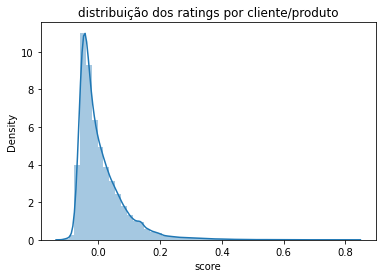

In [ ]:
ax = sns.distplot(recom.score)
plot_is = ax.set(title='distribuição dos ratings por cliente/produto')

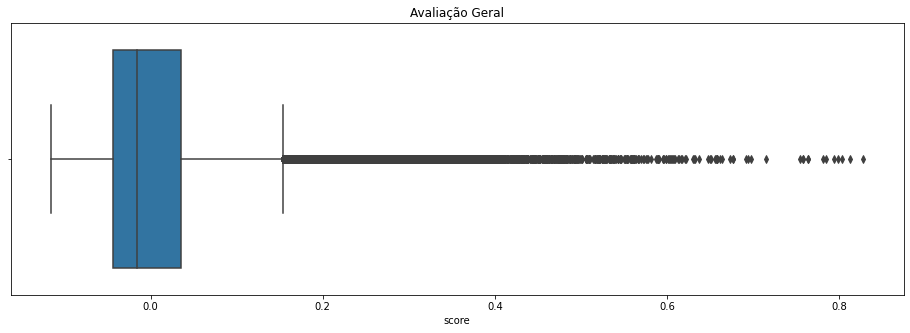

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
sns.boxplot(x=recom.score)
plot_is = ax.set(title='Avaliação Geral')

In [ ]:
print("Media :  {}\nMax : {} \nMin : {}\nDesvio :{}".format(recom.score.groupby(recom['rank']).mean(),recom.score.groupby(recom['rank']).max(),recom.score.groupby(recom['rank']).min(),recom.score.groupby(recom['rank']).std()))

Media :  rank
1     0.05
2     0.03
3     0.02
4     0.01
5     0.00
6     0.00
7    -0.00
8    -0.01
9    -0.01
10   -0.01
Name: score, dtype: float64
Max : rank
1    0.83
2    0.66
3    0.64
4    0.62
5    0.60
6    0.60
7    0.54
8    0.53
9    0.52
10   0.52
Name: score, dtype: float64 
Min : rank
1    -0.10
2    -0.10
3    -0.10
4    -0.11
5    -0.11
6    -0.11
7    -0.11
8    -0.11
9    -0.11
10   -0.12
Name: score, dtype: float64
Desvio :rank
1    0.10
2    0.09
3    0.08
4    0.07
5    0.07
6    0.07
7    0.07
8    0.06
9    0.06
10   0.06
Name: score, dtype: float64


In [ ]:
fig, ax = plt.subplots(figsize=(16,40))
sns.boxplot(x=recom.score, y=recom.Material)
plot_is = ax.set(title='Avaliação por Produto Recomendado')